# ZeroR classifer

# Loading Libaries

In [1]:
import numpy as np
import pandas as pd


In [2]:
data = {
    'Outlook': ["Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Sunny",
               "Overcast", "Rainy", "Rainy", "Sunny", "Rainy", "Overcast",
               "Overcast", "Sunny"],
    'Temp': ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild",
            "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    'Humidity': ["High", "High", "High", "High", "Normal", "Normal", "Normal",
                "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    'Windy': ["False", "True", "False", "False", "False", "True", "True", 
             "False", "False", "False", "True", "True", "False", "True"],
    
    'Play Golf': ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", 
                 "Yes", "Yes", "Yes", "Yes", "No"]
}

df = pd.DataFrame(data)
df

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [3]:
test_data = {
    'Outlook': ["Rainy", "Overcast", "Rainy"],
    'Temp': ["Hot", "Hot", "Hot"],
    'Humidity': ["Normal", "Normal", "Normal"],
    'Windy': ["True", "True", "False"],
    
    'Play Golf': ["No", "No", "Yes"]
}
testSet = pd.DataFrame(test_data)
testSet

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,Normal,True,No
1,Overcast,Hot,Normal,True,No
2,Rainy,Hot,Normal,False,Yes


# ZeroR Classifier using Sklearn

In [4]:
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy = "most_frequent")
X = df.drop(columns = 'Play Golf')
y = df['Play Golf']

In [5]:
X

,Outlook,Temp,Humidity,Windy
0,Rainy,Hot,High,False
1,Rainy,Hot,High,True
2,Overcast,Hot,High,False
3,Sunny,Mild,High,False
4,Sunny,Cool,Normal,False
5,Sunny,Cool,Normal,True
6,Overcast,Cool,Normal,True
7,Rainy,Mild,High,False
8,Rainy,Cool,Normal,False
9,Sunny,Mild,Normal,False


In [6]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Golf, dtype: object

In [7]:
import time
t0 = time.time()
dummy.fit(X, y)
print("Training time:", time.time()-t0)

Training time: 0.0


In [8]:
testSet

,Outlook,Temp,Humidity,Windy,Play Golf
0,Rainy,Hot,Normal,True,No
1,Overcast,Hot,Normal,True,No
2,Rainy,Hot,Normal,False,Yes


In [9]:
testX = testSet.drop('Play Golf', axis = 1)

In [10]:
dummy.predict(testX)

array(['Yes', 'Yes', 'Yes'], dtype='<U3')

In [11]:
from sklearn.metrics import accuracy_score
print('Train Accuracy', accuracy_score(df['Play Golf'], dummy.predict(X)))
print('Test Accuracy', accuracy_score(testSet['Play Golf'], 
                                      dummy.predict(testX)))

Train Accuracy 0.6428571428571429
Test Accuracy 0.3333333333333333


In [12]:
from sklearn.metrics import classification_report
print(classification_report(testSet['Play Golf'], dummy.predict(testX)))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         2
         Yes       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(classification_report(y, dummy.predict(X)))

              precision    recall  f1-score   support

          No       0.00      0.00      0.00         5
         Yes       0.64      1.00      0.78         9

    accuracy                           0.64        14
   macro avg       0.32      0.50      0.39        14
weighted avg       0.41      0.64      0.50        14



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ZeroR Classifier Loss

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

def zeroR_loss_function(true_labels, predictions):
    #majority_class = true_labels.value_counts().idxmax()
    #print(majority_class)
    misclassification_rate = 1-accuracy_score(true_labels, predictions)
    #print(misclassification_rate)
    # Plot the loss (misclassification rate)
    plt.figure(figsize=(8, 5))
    plt.plot(true_labels, label='True Labels', linestyle='-', marker='o')
    plt.plot(predictions, label='ZeroR Predictions', linestyle='--', marker='x', color='red')
    plt.title(f"ZeroR Classifier Loss (Misclassification Rate: {misclassification_rate:.2f})")
    plt.xlabel("Sample Index")
    plt.ylabel("Class Label")
    plt.legend()
    plt.show()

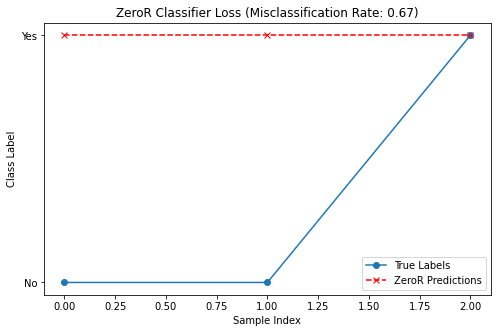

In [15]:
zeroR_loss_function(testSet['Play Golf'], dummy.predict(testX))

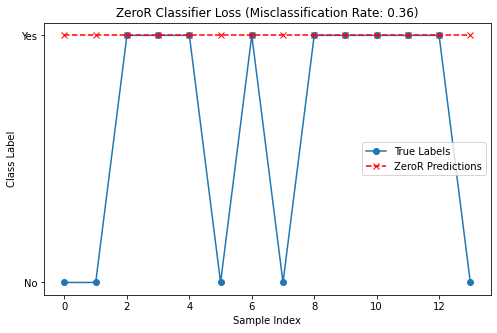

In [16]:
zeroR_loss_function(y, dummy.predict(X))

# Custom ZeroR Classifier

In [17]:
y.value_counts()

Yes    9
No     5
Name: Play Golf, dtype: int64

In [18]:
y.value_counts().idxmax()

'Yes'

In [19]:
from sklearn.base import ClassifierMixin
from sklearn.base import BaseEstimator

class ZeroR(BaseEstimator, ClassifierMixin):
    def __init__(self):
       pass
    def fit(self, X= None, y = None):
        self.y_hat = y.value_counts().idxmax()
        return self
    def predict(self, X=None):
        return np.full((1, X.shape[0]), self.y_hat)

In [20]:
model = ZeroR()
model.fit(X, y)
model.predict(testX)

array([['Yes', 'Yes', 'Yes']], dtype='<U3')